In [1]:
# importing the packages

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [15]:
# importing the dataset

data = pd.read_csv('data science africa.csv')

In [16]:
#checking the first five rows of my dataset

data.head()

,feature_1,feature_2,label
0,1.147868,0.937782,1
1,0.173189,-0.264483,0
2,0.680447,0.048147,1
3,-1.088036,1.028807,1
4,1.193379,-1.155007,0


In [17]:
# splitting my target variable into X & y

X = data.drop('label', axis=1)
y = data.label

In [18]:
# calling in the train_test_split function 

from sklearn.model_selection import train_test_split

In [19]:
#splitting the dataset into train & test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#encoding the categorical features

categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [21]:
model=LGBMClassifier(iterations=1000, #leaf_estimation_iterations=10,#800
                              learning_rate=0.1,
                              depth=4,loss_function='MultiClass',#,scale_pos_weight=200,
                             #l2_leaf_reg=5,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='AUC',
                              metric_period=20,
                                   #class_weights=0,
                              #od_type='Iter',
                              #od_wait=45,
                              #random_seed=10,
                              allow_writing_files=False)

In [22]:
#fitting the model on x & y

model.fit(X,y)

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: bootstrap_type
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: metric_period
[LightGBM] [Warning] Unknown parameter: allow_writing_files


LGBMClassifier(allow_writing_files=False, boosting_type='gbdt',
               bootstrap_type='Bernoulli', class_weight=None,
               colsample_bytree=1.0, depth=4, eval_metric='AUC',
               importance_type='split', iterations=1000, learning_rate=0.1,
               loss_function='MultiClass', max_depth=-1, metric_period=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

In [23]:
#calling in the (AUC) function

from sklearn.metrics import roc_auc_score

In [24]:
#checking the roc_auc_score of my prediction

print(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

1.0


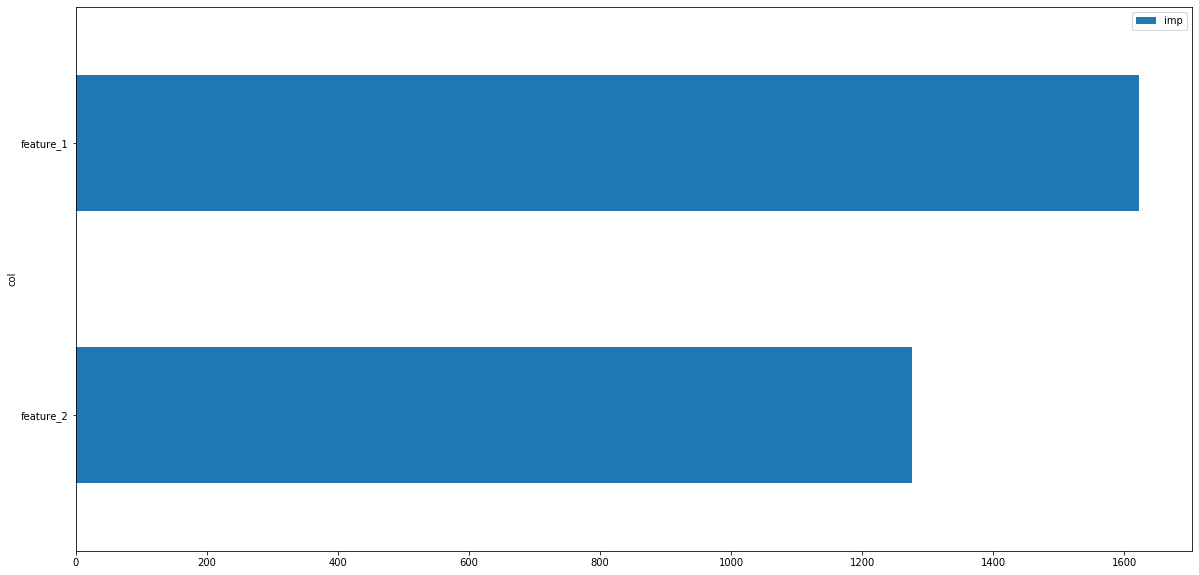

In [25]:
#checking the feature importance

fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')